In [1]:
# LIBRARIES

import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)
from matplotlib import cm
from matplotlib.ticker import MaxNLocator

plt.rcParams.update({
	"text.usetex" : True,
	"font.family" : "serif",
	"font.serif" : ["Computer Modern Serif"]
})

numpy: 1.21.5
matplotlib: 3.5.1


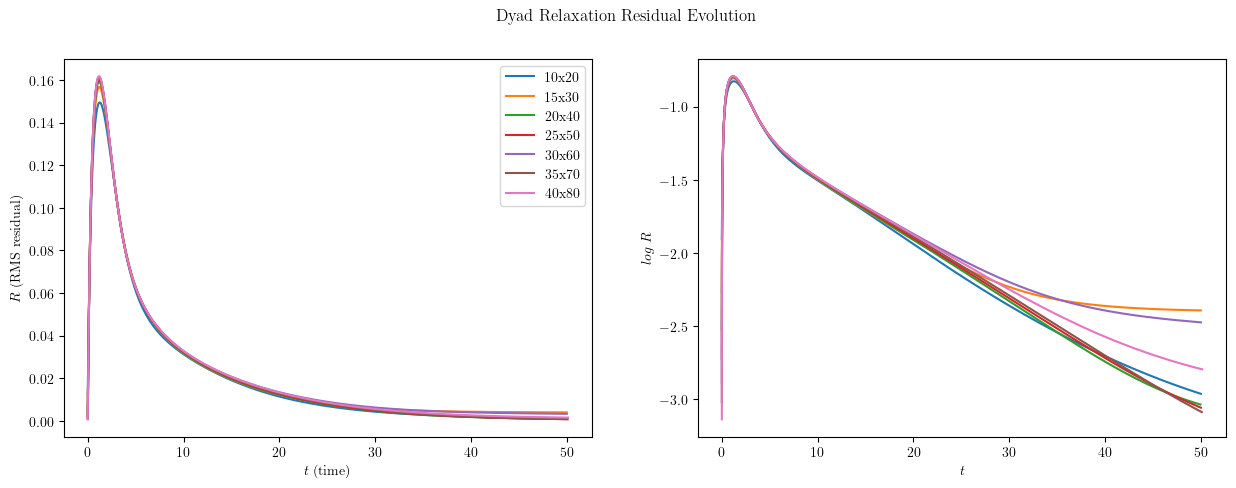

In [21]:
# DYAD RELAXATION RESIDUAL

fig, (ax1, ax2) = plt.subplots(1,2)

entries = [
	[np.genfromtxt('residuals_nonaxi_peanut_10x20.csv', delimiter=','), '10x20', 2.25e-02],
	[np.genfromtxt('residuals_nonaxi_peanut_15x30.csv', delimiter=','), '15x30', 1.00e-02],
	[np.genfromtxt('residuals_nonaxi_peanut_20x40.csv', delimiter=','), '20x40', 5.62e-03],
	[np.genfromtxt('residuals_nonaxi_peanut_25x50.csv', delimiter=','), '25x50', 3.60e-03],
	[np.genfromtxt('residuals_nonaxi_peanut_30x60.csv', delimiter=','), '30x60', 2.50e-03],
	[np.genfromtxt('residuals_nonaxi_peanut_35x70.csv', delimiter=','), '35x70', 1.84e-03],
	[np.genfromtxt('residuals_nonaxi_peanut_40x80.csv', delimiter=','), '40x80', 1.41e-03],
]


for entry in entries:
	i_values = np.array(entry[0][:,0])
	residuals = np.array(entry[0][:,1])
	log_residuals = np.log(residuals) / np.log(10)

	label = entry[1]

	time_step = entry[2]
	times = np.array(i_values) * time_step
 
	ax1.plot(times, residuals, label = label)
	ax1.set(xlabel='$t$ (time)', ylabel='$R$ (RMS residual)')

	ax2.plot(times, log_residuals, label = label)
	ax2.set(xlabel='$t$', ylabel='$log \; R$')

fig.suptitle('Dyad Relaxation Residual Evolution')
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax1.legend()
plt.show()

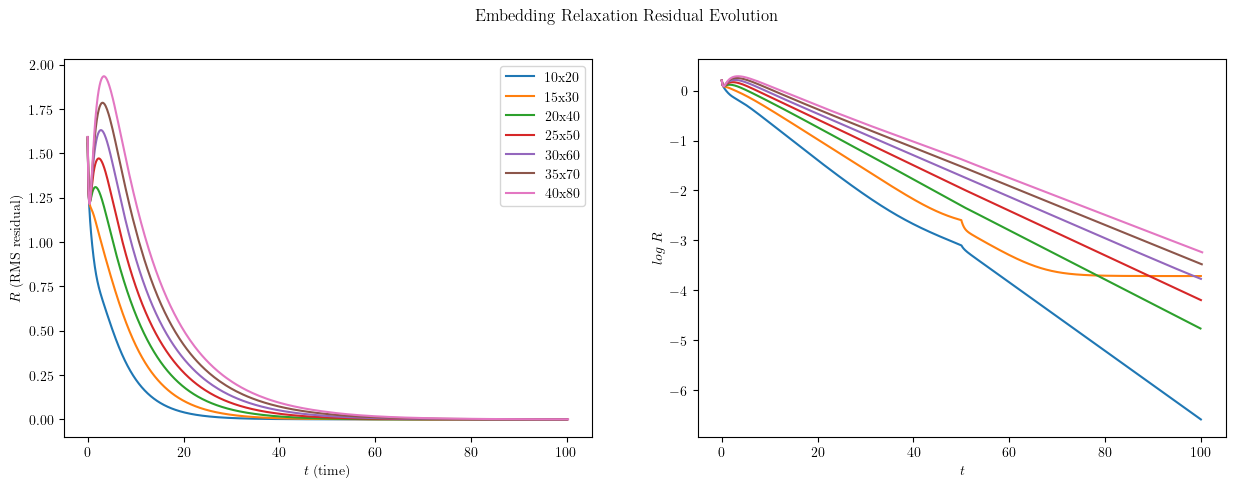

In [22]:
# EMBEDDING RELAXATION RESIDUAL

fig, (ax1, ax2) = plt.subplots(1,2)

entries = [
	[np.genfromtxt('embedding_residuals_nonaxi_peanut_10x20.csv', delimiter=','), '10x20', 2.25e-02],
	[np.genfromtxt('embedding_residuals_nonaxi_peanut_15x30.csv', delimiter=','), '15x30', 1.00e-02],
	[np.genfromtxt('embedding_residuals_nonaxi_peanut_20x40.csv', delimiter=','), '20x40', 5.62e-03],
	[np.genfromtxt('embedding_residuals_nonaxi_peanut_25x50.csv', delimiter=','), '25x50', 3.60e-03],
	[np.genfromtxt('embedding_residuals_nonaxi_peanut_30x60.csv', delimiter=','), '30x60', 2.50e-03],
	[np.genfromtxt('embedding_residuals_nonaxi_peanut_35x70.csv', delimiter=','), '35x70', 1.84e-03],
	[np.genfromtxt('embedding_residuals_nonaxi_peanut_40x80.csv', delimiter=','), '40x80', 1.41e-03],
]


for entry in entries:
	i_values = np.array(entry[0][:,0])
	residuals = np.array(entry[0][:,1])
	log_residuals = np.log(residuals) / np.log(10)

	label = entry[1]

	time_step = entry[2]
	times = np.array(i_values) * time_step

	ax1.plot(times, residuals, label = label)
	ax1.set(xlabel='$t$ (time)', ylabel='$R$ (RMS residual)')

	ax2.plot(times, log_residuals, label = label)
	ax2.set(xlabel='$t$', ylabel='$log \; R$')

fig.suptitle('Embedding Relaxation Residual Evolution')
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax1.legend()
plt.show()

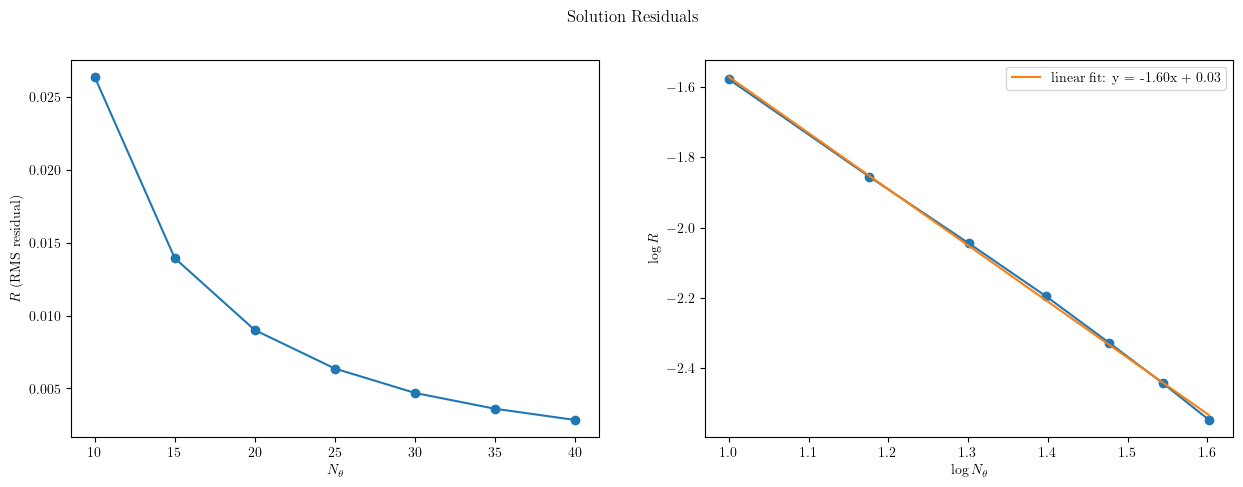

In [18]:
# SOLUTION RESIDUALS (CONVERGENCE TEST)

fig, (ax1, ax2) = plt.subplots(1,2)

entries = np.genfromtxt('solution_residuals.csv', delimiter=',')

N_values = np.array(entries[:,0])
residuals = np.array(entries[:,1])
log_N_values = np.log(N_values) / np.log(10)
log_residuals = np.log(residuals) / np.log(10)

ax1.plot(N_values, residuals, marker='o')
ax1.set(xlabel=r'$N_{\theta}$', ylabel=r'$R$ (RMS residual)')

a, b = np.polyfit(log_N_values, log_residuals, 1)
ax2.plot(log_N_values, log_residuals, marker='o')
ax2.plot(log_N_values, a*log_N_values+b, label=f'linear fit: y = {a:.2f}x + {b:.2f}')
ax2.set(xlabel=r'$\log N_\theta$', ylabel=r'$\log R$')

fig.suptitle('Solution Residuals')
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax2.legend()
plt.show()

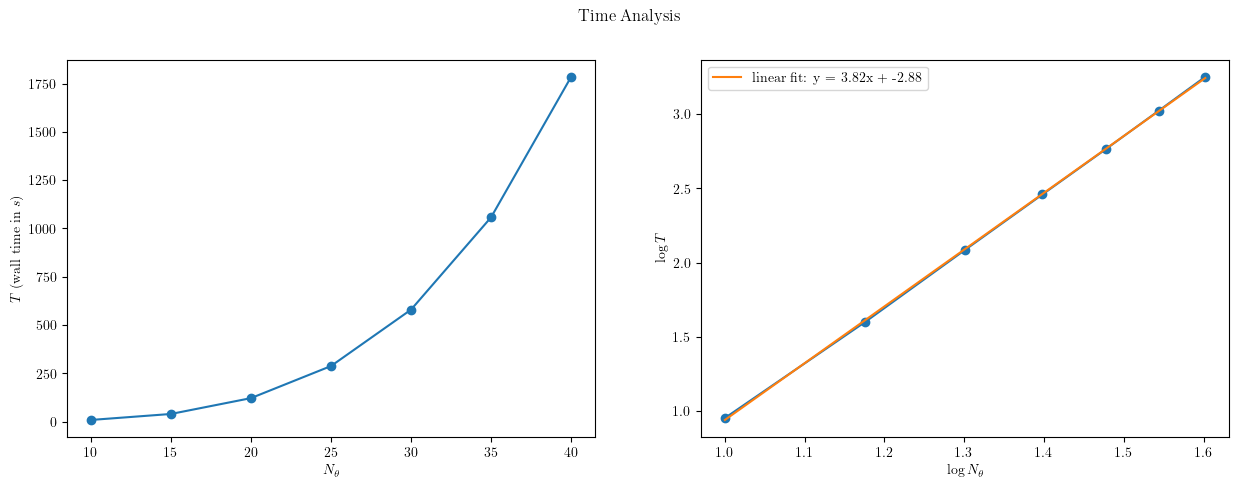

In [16]:
# TIME ANALYSIS
fig, (ax1, ax2) = plt.subplots(1,2)

entries = np.genfromtxt('durations.csv', delimiter=',')

N_values = np.array(entries[:,0])
durations = np.array(entries[:,1])
log_N_values = np.log(N_values) / np.log(10)
log_durations = np.log(durations) / np.log(10)

ax1.plot(N_values, durations, marker='o')
ax1.set(xlabel=r'$N_{\theta}$', ylabel=r'$T$ (wall time in $s$)')

a, b = np.polyfit(log_N_values, log_durations, 1)
ax2.plot(log_N_values, log_durations, marker='o')
ax2.plot(log_N_values, a*log_N_values+b, label=f'linear fit: y = {a:.2f}x + {b:.2f}')
ax2.set(xlabel=r'$\log N_\theta$', ylabel=r'$\log T$')

fig.suptitle('Time Analysis')
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax2.legend()
plt.show()

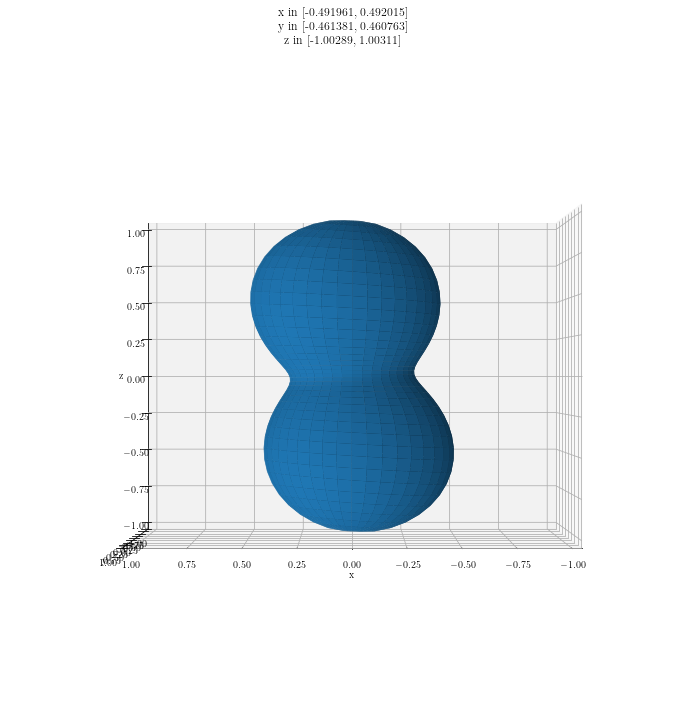

In [17]:
N_theta = 40
# N_phi = 4*N_theta
N_phi = 2*N_theta

fig = plt.figure(layout="constrained")

embedding = np.genfromtxt(f'embedding_nonaxi_peanut_{N_theta}x{N_phi}.csv', delimiter=',')
# embedding = np.genfromtxt(f'embedding_numerical_{N_theta}x{N_phi}.csv', delimiter=',')

x = embedding[:,0]
y = embedding[:,1]
z = embedding[:,2]

X = np.reshape(x, (N_theta, N_phi))
Y = np.reshape(y, (N_theta, N_phi))
Z = np.reshape(z, (N_theta, N_phi))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
# ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

plt.title(f'x in [{min(x)}, {max(x)}]\ny in [{min(y)}, {max(y)}]\nz in [{min(z)}, {max(z)}]')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

side = max(max(x), max(y), max(z))
ax.set_xlim(-side, side)
ax.set_ylim(-side, side)
ax.set_zlim(-side, side)

ax.view_init(0, 90) # elev, azim
# ax.view_init(90, 90) # elev, azim
# ax.view_init(30, 120) # elev, azim
fig.set_size_inches(20, 10, forward=True)

plt.show()